In [1]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

In [2]:
# 标定图像的路径
path = './calibrate_images/v1'
# 每个棋盘格子的边长（cm）
bc = 5

36


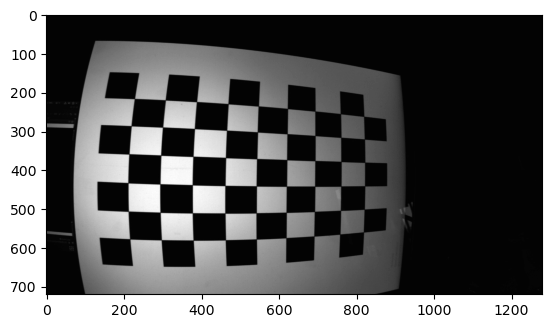

In [3]:
# 读取所有标定图的灰度图
fs = os.listdir(path)
grays = []
for f in fs:
    if f.split('.')[-1] in ('jpg', 'jpeg', 'png'):
        fName = os.path.join(path, f)
        gray = cv2.imread(fName, 0)
        grays.append(gray)
print(len(grays))
plt.imshow(grays[0], cmap='gray')

In [4]:
w, h = 9, 6
# 亚像素点检测的终止条件
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)
corners = []
for g in grays:
    ret, corner = cv2.findChessboardCorners(g, (w, h), None)
    corner = cv2.cornerSubPix(g, corner.astype(np.float32), (5, 5), (-1, -1), criteria)
    corners.append(np.squeeze(corner))
print(len(corners))

36


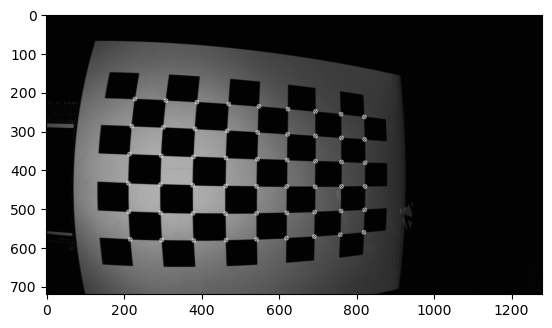

In [5]:
# 绘制角点
cv2.drawChessboardCorners(grays[0], (w, h), corners[0], None)
plt.imshow(grays[0], cmap='gray')

In [6]:
# 标定
objp = np.zeros((w * h, 3), np.float32)
objp[:, :2] = np.mgrid[0:w, 0:h].T.reshape(-1, 2) * bc
objps = [objp for _ in range(len(grays))]

size = grays[0].shape[::-1]  # shape与我们这里使用的坐标顺序是相反,需要倒序取
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objps, corners, size, None, None)
print('相机内参:\n', mtx)
print('畸变参数:\n', dist)
print('旋转向量:\n', rvecs)
print('平移向量:\n', tvecs)

相机内参:
 [[912.84109894   0.         642.34127691]
 [  0.         765.81192977 364.67610487]
 [  0.           0.           1.        ]]
畸变参数:
 [[-4.34946240e-01  3.02465401e-01 -3.51661427e-04 -1.89413404e-04
  -1.48954935e-01]]
旋转向量:
 (array([[-0.08674948],
       [-0.39845608],
       [ 0.02646975]]), array([[-0.05780877],
       [-0.05113022],
       [ 0.05862205]]), array([[ 0.08227562],
       [-0.45738575],
       [ 0.07352831]]), array([[-0.26704332],
       [-0.41188025],
       [ 0.12348992]]), array([[-0.34203758],
       [-0.0897754 ],
       [ 0.1329321 ]]), array([[-0.31668615],
       [ 0.17800443],
       [ 0.08959432]]), array([[-0.28137105],
       [ 0.56486735],
       [ 0.09830374]]), array([[-0.33602647],
       [ 0.4908161 ],
       [ 0.14579817]]), array([[-0.3737574 ],
       [-0.11563819],
       [ 0.07401912]]), array([[-0.31582037],
       [-0.44611256],
       [ 0.07417225]]), array([[-0.24537661],
       [-0.58960181],
       [ 0.04656356]]), array([[ 0.577636

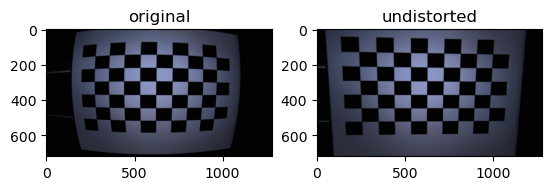

In [20]:
# 利用得到的参数矫正
test_path = './val_images/v1/39.jpg'
test_img = cv2.imread(test_path)
plt.subplot(1, 2, 1), plt.title('original')
plt.imshow(cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB))

# h, w = test_img.shape[:2]
# new_camera_mtx, roi = cv2.getOptimalNewCameraMatrix(mtx, dist, (w, h), 1, (w, h))
# undistorted_img = cv2.undistort(test_img, mtx, dist, None, new_camera_mtx)
# x, y, w, h = roi
# undistorted_img = undistorted_img[y:y+h, x:x+w]
undistorted_img = cv2.undistort(test_img, mtx, dist, None)
plt.subplot(1, 2, 2), plt.title('undistorted')
plt.imshow(cv2.cvtColor(undistorted_img, cv2.COLOR_BGR2RGB))